# 1. Preamble

This is a practice for classification projects. I will analyze datasets from Kaggle.

The initial approach is:

#### a) import the databases:
    
    i) check the parameters required to get the file properly loaded

#### b) table cleansing:
    
    i) adjust columns headers and indexes
    ii) evaluate table completeness (NaN, field types, etc)

#### c) Numerical columns:

    i) quick statistical analysis (descriptive statistics) of the columns (range - minimum and maximum, mean, standard deviation, median, mode, N)
    ii) graphical evaluation (whisker box-plot and histograms)

#### d) Categorical columns:
    
    i) sort uniques to check mispelling or variations of equivalent values
    ii) count of distinct values
    iii) graphical representation of the counts (histograms)

#### e) definition of the target variable for a classification problem:
    i) discover which variable is the classifier, i.e. the output of your model that will tell you to which group each input "belongs to"
    
##### f) Initial exploration
    
    i) scatterplot of each parameter versus the expected classification

*Let's start!!!*

In [1]:
# Default libraries: pandas, numpy
import pandas as pd
import numpy as np

import math

# Load collections of functions
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

from clustergram import Clustergram
# import urbangrammar_graphics as ugg
import seaborn as sns

from sklearn.preprocessing import scale

# Credit Approval Data Set
https://www.kaggle.com/impapan/credit-approval-data-set

## About this dataset
This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.
Attribute Information:

A1: b, a.

A2: continuous.

A3: continuous.

A4: u, y, l, t.

A5: g, p, gg.

A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.

A7: v, h, bb, j, n, z, dd, ff, o.

A8: continuous.

A9: t, f.

A10: t, f.

A11: continuous.

A12: t, f.

A13: g, p, s.

A14: continuous.

A15: continuous.

A16: +,- (class attribute)

## Acknowledgements
If you use this dataset in your research, please credit the authors

## Citations
Papers that cite this dataset

Xiaoming Huo. FBP: A Frontier-Based Tree-Pruning Algorithm. Seoung Bum Kim. 2002.

Lorne Mason and Peter L. Bartlett and Jonathan Baxter. Improved Generalization Through Explicit Optimization of Margins. Machine Learning, 38. 2000.

Kagan Tumer and Joydeep Ghosh. Robust Combining of Disparate Classifiers through Order Statistics. CoRR, csLG/9905013. 1999.

Lorne Mason and Peter L. Bartlett and Jonathan Baxter. Direct Optimization of Margins Improves Generalization in Combined Classifiers. NIPS. 1998.

In [2]:
# import sys
# print(sys.path)
# help(pd.read_csv)

### A. IMPORT DATA

In [3]:
main_path = 'C:\\Users\\map_f\\OneDrive\\Documents\\Dropbox\\Springboard\\GitHub\\Classification\\'
project_path = 'Credit_approval\\'
file_name = 'crxdata.csv'

path = main_path + project_path
file = path + file_name

# parser = TextFileReader(fp_or_buf, **kwds)
# header_list = ('A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A13','A14','A15','class')

raw_data = pd.read_csv(file,index_col= None,delimiter=',',header=None)
# type(raw_data)

In [4]:
type(raw_data)

pandas.core.frame.DataFrame

### B. DATA "CLEANSING"

In [5]:
raw_data.shape

(690, 16)

Data has 690 entries and 16 columns.

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
# raw_data = raw_data.dropna(how='all')

In [8]:
raw_data.head(10)

0      1       2  3  4   5  6      7  8  9   10 11 12     13     14 15
0  b  30.83   0.000  u  g   w  v  1.250  t  t   1  f  g  00202      0  +
1  a  58.67   4.460  u  g   q  h  3.040  t  t   6  f  g  00043    560  +
2  a  24.50   0.500  u  g   q  h  1.500  t  f   0  f  g  00280    824  +
3  b  27.83   1.540  u  g   w  v  3.750  t  t   5  t  g  00100      3  +
4  b  20.17   5.625  u  g   w  v  1.710  t  f   0  f  s  00120      0  +
5  b  32.08   4.000  u  g   m  v  2.500  t  f   0  t  g  00360      0  +
6  b  33.17   1.040  u  g   r  h  6.500  t  f   0  t  g  00164  31285  +
7  a  22.92  11.585  u  g  cc  v  0.040  t  f   0  f  g  00080   1349  +
8  b  54.42   0.500  y  p   k  h  3.960  t  f   0  f  g  00180    314  +
9  b  42.50   4.915  y  p   w  v  3.165  t  f   0  t  g  00052   1442  +

In [9]:
numerical = [1,2,7,10,13,14]
categorical = [0,3,4,5,6,8,9,11,12]
classification = [15]

All columns have the same amount of rows and visually inspecting the head against the types all columns, except column 1, are following the table description.

In [10]:
raw_data.iloc[:,[1]].describe()

1
count   690
unique  350
top       ?
freq     12

Column 1 has some value(s) with a question mark. This requires some cleansing.

In [11]:
raw_data[raw_data.iloc[:,[1]]=='?'].count()

0      0
1     12
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

In [12]:
raw_data[1] = pd.to_numeric(raw_data[1], errors='coerce')
raw_data[13] = pd.to_numeric(raw_data[13], errors='coerce')

In [13]:
# raw_data = raw_data[ (raw_data[1].notnull())]

In [14]:
df = raw_data

### C. Numerical columns

In [15]:
df.iloc[:,numerical].describe()

1           2           7          10           13  \
count  678.000000  690.000000  690.000000  690.00000   677.000000   
mean    31.568171    4.758725    2.223406    2.40000   184.014771   
std     11.957862    4.978163    3.346513    4.86294   173.806768   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.602500    1.000000    0.165000    0.00000    75.000000   
50%     28.460000    2.750000    1.000000    0.00000   160.000000   
75%     38.230000    7.207500    2.625000    3.00000   276.000000   
max     80.250000   28.000000   28.500000   67.00000  2000.000000   

                  14  
count     690.000000  
mean     1017.385507  
std      5210.102598  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%       395.500000  
max    100000.000000

In [16]:
df.iloc[:,numerical].median()

1      28.46
2       2.75
7       1.00
10      0.00
13    160.00
14      5.00
dtype: float64

In [17]:
df.iloc[:,numerical].mode()

1    2    7   10   13  14
0  22.67  1.5  0.0   0  0.0   0

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

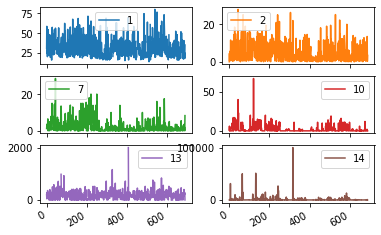

In [18]:
df.iloc[:,numerical].plot(subplots=True, layout=(3,2))

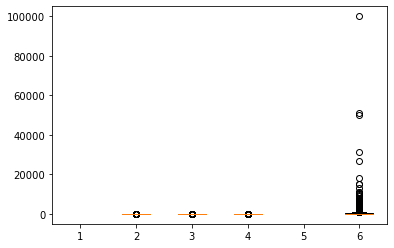

In [19]:
plt.clf
plt.boxplot(df.iloc[:,numerical])
plt.show()

Columns 1 and 13 have values NaN values.

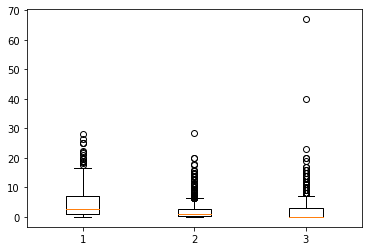

In [20]:
plt.clf
plt.boxplot(df.iloc[:,[2,7,10]])
plt.show()

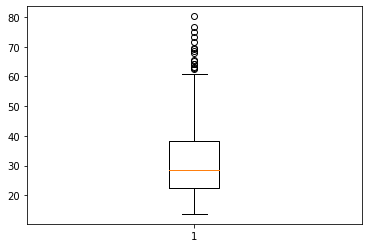

In [21]:
plt.clf
temp = df[1][(df[1].notnull())]
plt.boxplot(temp)
plt.show()

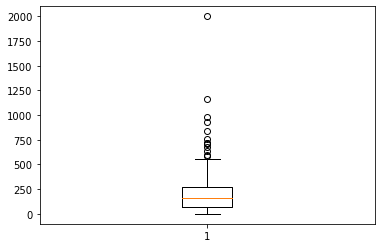

In [22]:
plt.clf
temp = df[13][(df[13].notnull())]
plt.boxplot(temp)
plt.show()

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>]], dtype=object)

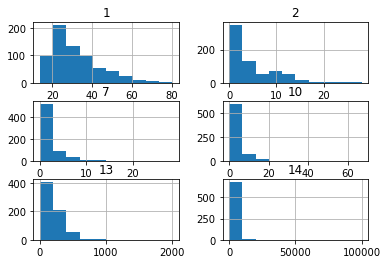

In [23]:
df.iloc[:,numerical].hist()

<AxesSubplot:>

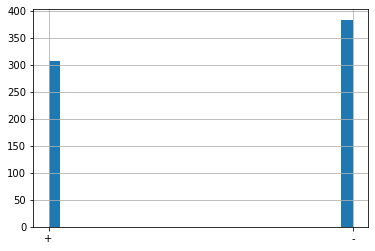

In [24]:
raw_data[15].hist(bins=int(math.sqrt(raw_data[15].count()))) # "ideal" bin size: sqrt(N)

### D. Categorical

In [25]:
# Uniques
import pandas as pd

colNames = df.columns.tolist()
uniqueValsList = []                    

for each in colNames:
    uniqueVals = list(df[each].unique())
    uniqueValsList.append(pd.Series(data=uniqueVals,name=each))

maxlen = 0
for each in uniqueValsList:
    if len(each) > maxlen:
        maxlen = len(each)

fillerData = np.empty((maxlen,len(colNames),))
dfDiff = pd.DataFrame(columns=colNames,data=fillerData)

for i in range(len(uniqueValsList)):
    dfDiff[colNames[i]] = uniqueValsList[i]
dfDiff


# from IPython.display import HTML, display
# import tabulate

# listOfLists = []
# for i in range(len(uniqueValsList)):
#     thisList = []
#     thisList.append(colNames[i])
#     for each in uniqueValsList[i].tolist():
#         thisList.append(each)
#     listOfList.append(thisList)

# display(HTML(tabulate.tabulate(listOfLists, tablefmt='html')))

0      1      2    3    4    5    6     7    8    9    10   11   12  \
0      b  30.83  0.000    u    g    w    v  1.25    t    t  1.0    f    g   
1      a  58.67  4.460    y    p    q    h  3.04    f    f  6.0    t    s   
2      ?  24.50  0.500    ?    ?    m   bb  1.50  NaN  NaN  0.0  NaN    p   
3    NaN  27.83  1.540    l   gg    r   ff  3.75  NaN  NaN  5.0  NaN  NaN   
4    NaN  20.17  5.625  NaN  NaN   cc    j  1.71  NaN  NaN  7.0  NaN  NaN   
..   ...    ...    ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
345  NaN  30.33    NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
346  NaN  47.17    NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
347  NaN  25.83    NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
348  NaN  50.25    NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
349  NaN  36.42    NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   

        13       14   15  
0    202.0      0.0    +  
1     43.0    560.0    -  
2    280.0    824.0  NaN  
3    100.0      3.0  NaN  
4    120.0  31285.0  NaN  
..     ...      ...  ...  
345    NaN      NaN  NaN  
346    NaN      NaN  NaN  
347    NaN      NaN  NaN  
348    NaN      NaN  NaN  
349    NaN      NaN  NaN  

[350 rows x 16 columns]

In [26]:
# Count most common values
lst = df[categorical]
data = Counter(lst)
data.most_common()   # Returns all unique items and their counts

[(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (8, 1), (9, 1), (11, 1), (12, 1)]

In [27]:
# bar graph of values for the variable
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# x = data[slice(None),slice(1)]
# y = data[slice(None),slice(2)]
# ax.bar(x,y)
# plt.show()

In [28]:
# plt.clf
# plt.plot(df.iloc[:,])
# plt.show()

### E. TARGET DEFINITION

By the problem definition the column 15 is the target column.

Once this a database for credit approval, seem logic to assume "+" as approved and "-" as declined.

The class columns has no missing values.

### F. INITIAL EXPLORATION